<a href="https://colab.research.google.com/github/Astrocitos/Advanced-ML-Practices/blob/main/TC4033_Activity2b_ID40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TC 5033
## Deep Learning
## Fully Connected Deep Neural Networks using PyTorch
<br>

#### Activity 2a: Implementing a FC for ASL Dataset using PyTorch
<br>


- Objective

    The primary aim of this activity is to transition from using Numpy for network implementation to utilizing PyTorch, a powerful deep learning framework. You will be replicating the work you did for the ASL dataset in Activity 1b, but this time, you'll implement a your multi layer FC model using PyTorch.
    
- Instructions

    Review Previous Work: Begin by reviewing your Numpy-based Fully Connected Network for the ASL dataset from Activity 1b. Note the architecture, hyperparameters, and performance metrics for comparison.

    Introduce PyTorch: If you're new to PyTorch, take some time to familiarize yourself with its basic operations and syntax. You can consult the official documentation or follow online tutorials.

    Prepare the ASL Dataset: As before, download and preprocess the Kaggle ASL dataset.

    Implement the Network: Design your network architecture tailored for the ASL dataset. Pay special attention to PyTorch modules like nn.Linear() and nn.ReLU().

    Train the Model: Implement the training loop, making use of PyTorch's autograd to handle backpropagation. Monitor metrics like loss and accuracy as the model trains.

    Analyze and Document: In Markdown cells, discuss the architecture choices, any differences in performance between the Numpy and PyTorch implementations, and insights gained from using a deep learning framework like PyTorch.

##**Lead Professor**

##Dr. Jose Antonio Cantoral-Ceballos



##**Asistant Professor**

##Dr. Carlos Villaseñor

#**Team 40**

##**Members:**

##Iossif Moises Palli Laura                  A01794457

##Astrid Rosario Bernaga Torres              A01793080

##Cecilia Acevedo Rodríguez                  A01793953

##Fredy Reyes Sánchez                        A01687370

# Introduction:

In this notebook, we will explore the process of building and training deep learning models using PyTorch. We will work on two different tasks: sign language classification and image classification on the CIFAR-10 dataset.

## Image classification on CIFAR-10

The second task is image classification on the CIFAR-10 dataset. CIFAR-10 is a well-known dataset that contains 60,000 32x32 color images in 10 different classes, with 6,000 images per class. The objective here is to build a convolutional neural network (CNN) that can classify these images into their respective categories.

### CIFAR-10 Dataset Overview:

The CIFAR-10 dataset is a widely used benchmark dataset for image classification tasks. It consists of 60,000 color images, which are divided into 10 classes, with each class containing 6,000 images. This dataset is often used for evaluating the performance of image classification models. Here's an overview of the CIFAR-10 dataset:

### Dataset Details
* Number of Classes: 10
* Total Number of Images: 60,000
* Images per Class: 6,000
* Image Dimensions: 32x32 pixels
* Color Channels: RGB (3 channels)
* Number of Training Images: 50,000
* Number of Testing Images: 10,000

### Class Labels:

* Airplane
* Automobile (Car)
* Bird
* Cat
* Deer
* Dog
* Frog
* Horse
* Ship
* Truck

### Dataset Split
The CIFAR-10 dataset is typically divided into three subsets:

Training Set: This subset contains 50,000 images, which are used to train machine learning models. Each class has an equal number of images (5,000 images per class).

Validation Set: Sometimes referred to as the development set, it contains a portion of the data (usually 10% of the training set) and is used for hyperparameter tuning and model evaluation during training.

Test Set: The remaining 10,000 images are reserved for evaluating the final performance of the trained models. It is used to assess how well the model generalizes to unseen data.

In [104]:
pip install jupyterthemes

In [105]:
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

#PyTorch stuff
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim
import torchvision.transforms as transforms


# Solamente para usuarios de Jupyter Themes
from jupyterthemes import jtplot
jtplot.style(grid=False)

In [106]:
#import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
# Load the dataset
DATA_PATH = '/content/drive/MyDrive/Tarea 1b/asl_data'
train_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_train.csv'))
valid_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_valid.csv'))

### Always a good idea to explore the data

In [108]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


### Get training label data

In [109]:
#Extract labels and features
y_train = np.array(train_df['label'])
y_val = np.array(valid_df['label'])
del train_df['label']
del valid_df['label']
x_train = train_df.values.astype(np.float32)
x_val = valid_df.values.astype(np.float32)

In [110]:
print(x_train.shape)
print(y_train.shape)

(27455, 784)
(27455,)


In [111]:
print(x_val.shape, y_val.shape)

(7172, 784) (7172,)


In [112]:
def split_val_test(x, y, pct=0.5, shuffle=True):
    assert x.shape[0] == y.shape[0], 'Number of samples x!= number samples y'
    total_samples = x.shape[0]
    if shuffle:
        idxs = np.arange(x.shape[0])
        np.random.shuffle(idxs)
        x = x[idxs]
        y = y[idxs]
        #return x_val, y_val, x_test, y_test
#         return x[:total_samples//2, :], y[:total_samples//2], x[total_samples//2:, :], y[total_samples//2:]
    return x[:int(total_samples*pct), :], y[:int(total_samples*pct)], x[int(total_samples*(pct)):, :], y[int(total_samples*(pct)):]


In [113]:
x_val, y_val, x_test, y_test = split_val_test(x_val, y_val)

In [114]:
type(y_val)

numpy.ndarray

In [115]:
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(3586, 784) (3586,)
(3586, 784) (3586,)


In [116]:
alphabet=list(string.ascii_lowercase)
alphabet.remove('j')
alphabet.remove('z')
print(len(alphabet))

24


### Normalise the data

In [117]:
def normalise(x_mean, x_std, x_data):
    return (x_data - x_mean) / x_std

In [118]:
x_mean = x_train.mean()
x_std = x_train.std()

x_train = normalise(x_mean, x_std, x_train)
x_val = normalise(x_mean, x_std, x_val)
x_test = normalise(x_mean, x_std, x_test)


In [119]:
x_train.mean(), x_train.std()

(3.6268384e-06, 0.99999946)

In [120]:
def plot_number(image):
    plt.figure(figsize=(5,5))
    plt.imshow(image.squeeze(), cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show()

In [121]:
type(x_val)

numpy.ndarray

La imagen muestreada representa un: x


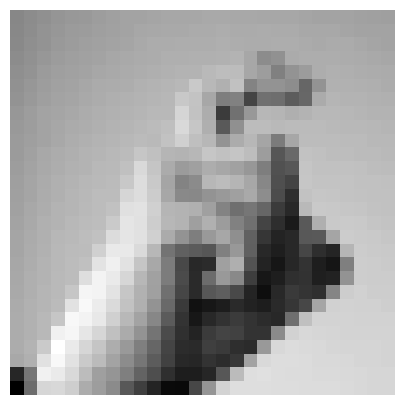

In [122]:
rnd_idx = np.random.randint(len(y_val))
# print(rnd_idx)
# print(y_val[rnd_idx])
print(f'La imagen muestreada representa un: {alphabet[y_val[rnd_idx]]}')
plot_number(x_val[rnd_idx].reshape(28,28))

### The model

$$z^1 = W^1 X + b^1$$

$$a^1 = ReLU(z^1) $$

$$z^2 = W^2 a^1 + b^2$$

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

### Create minibatches

In [123]:
def create_minibatches(mb_size, x, y, shuffle = True):
    '''
    x  #muestras, 784
    y #muestras, 1
    '''
    assert x.shape[0] == y.shape[0], 'Error en cantidad de muestras'
    total_data = x.shape[0]
    if shuffle:
        idxs = np.arange(total_data)
        np.random.shuffle(idxs)
        x = x[idxs]
        y = y[idxs]

    return ((x[i:i+mb_size], y[i:i+mb_size]) for i in range(0, total_data, mb_size))

In [124]:
for i, (x, y) in enumerate(create_minibatches(128,x_train, y_train)):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214


### Now the PyTorch part

In [125]:
x_train_tensor = torch.tensor(x_train.copy())
y_train_tensor = torch.tensor(y_train.copy())

x_val_tensor = torch.tensor(x_val.copy())
y_val_tensor = torch.tensor(y_val.copy())

x_test_tensor = torch.tensor(x_test.copy())
y_test_tensor = torch.tensor(y_test.copy())

In [126]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


### Accuracy

In [127]:
def accuracy(model, x, y, mb_size):
    num_correct = 0
    num_total = 0
    cost = 0.
    model.eval()
    model = model.to(device=device)
    with torch.no_grad():
        for mb, (xi, yi) in enumerate(create_minibatches(mb_size, x, y),1):
            xi = xi.to(device=device, dtype = torch.float32)
            yi = yi.to(device=device, dtype = torch.long)
            scores = model(xi) # mb_size, 10
            cost += (F.cross_entropy(scores, yi)).item()
            _, pred = scores.max(dim=1) #pred shape (mb_size )
            num_correct += (pred == yi.squeeze()).sum() # pred shape (mb_size), yi shape (mb_size, 1)
            num_total += pred.size(0)

        return cost/mb, float(num_correct)/num_total

### Training Loop

In [128]:
def train(model, optimiser, mb_size, epochs=100):
    model = model.to(device=device)
    train_cost = 0.
    val_cost = 0.
    for epoch in range(epochs):
        train_correct_num  = 0.
        train_total = 0.
        train_cost_acum = 0
        for mb, (xi, yi) in enumerate(create_minibatches(mb_size, x_train_tensor, y_train_tensor), 1):
            model.train()
            xi = xi.to(device=device, dtype=torch.float32)
            yi = yi.to(device=device, dtype=torch.long)
            scores = model(xi)
            # funcion cost
            cost = F.cross_entropy(input= scores, target=yi.squeeze())
            optimiser.zero_grad()
            cost.backward()
            optimiser.step()

            train_correct_num += (torch.argmax(scores, dim=1) == yi.squeeze()).sum()
            train_total += scores.size(0)

            train_cost_acum += cost.item()

        val_cost, val_acc = accuracy(model, x_val_tensor, y_val_tensor, mb_size)
        train_acc = float(train_correct_num)/train_total
        train_cost = train_cost_acum/mb
        if epoch%20 == 0:
            print(f'Epoch:{epoch}, train cost: {train_cost:.6f}, val cost: {val_cost:.6f},'
                      f' train acc: {train_acc:.4f}, val acc: {val_acc:4f},'
                      f' lr: {optimiser.param_groups[0]["lr"]:.6f}')


### Model using Sequential

In [129]:
#Instanciar modelo
# hidden1 = 100
hidden = 200
lr = 1e-3
epochs = 100
mb_size = 128
model1 = nn.Sequential(nn.Linear(in_features=784, out_features=hidden),
                       nn.Dropout(),
                       nn.ReLU(),
#                        nn.Linear(in_features=hidden1, out_features=hidden), nn.ReLU(),
                       nn.Linear(in_features=hidden, out_features=24))
# optimiser = torch.optim.SGD(model1.parameters(), lr=lr, momentum=0.9, weight_decay=1e-2)
optimiser = torch.optim.Adam(model1.parameters(), lr=lr, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimiser, 0.1, epochs=epochs, steps_per_epoch=215)

train(model1, optimiser, mb_size, epochs)

Epoch:0, train cost: 0.894511, val cost: 0.837093, train acc: 0.7193, val acc: 0.777747, lr: 0.004000
Epoch:20, train cost: 0.190437, val cost: 2.301377, train acc: 0.9624, val acc: 0.802844, lr: 0.004000
Epoch:40, train cost: 0.189000, val cost: 2.628642, train acc: 0.9653, val acc: 0.785834, lr: 0.004000
Epoch:60, train cost: 0.192215, val cost: 2.101055, train acc: 0.9643, val acc: 0.817345, lr: 0.004000
Epoch:80, train cost: 0.138625, val cost: 2.897260, train acc: 0.9721, val acc: 0.786949, lr: 0.004000


In [130]:
accuracy(model1, x_test_tensor, y_test_tensor, mb_size)[1]

0.7852760736196319

In [131]:
def predict(x, model):
    x = x.to(device=device, dtype = torch.float32)
    scores = model(x) # mb_size, 10
    _, pred = scores.max(dim=1) #pred shape (mb_size )
    return pred

La imagen muestreada representa un: l


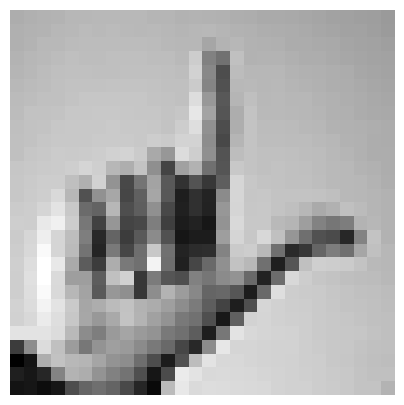

el valor predicho l


In [132]:
rnd_idx = np.random.randint(len(y_test))
print(f'La imagen muestreada representa un: {alphabet[y_test[rnd_idx]]}')
plot_number(x_test[rnd_idx].reshape(28,28))
pred=predict(x_test_tensor[rnd_idx].reshape(1, -1), model1)
print(f'el valor predicho {alphabet[pred]}')

##Imagen Classification on CIFAR-10

Data Loading and Preprocessing

For image classification on CIFAR-10, we use a convolutional neural network (CNN). We load the CIFAR-10 dataset, apply data augmentation, and normalize the images.

In [133]:
# Define the transformations for data augmentation and normalization
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

transform_val = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

In [182]:
# Batch size for training
batch_size = 512

In [183]:
# Load CIFAR-10 training and test datasets using torchvision
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
num_train_samples = len(train_dataset)
print(f"Number of training samples: {num_train_samples}")

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
valset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_val)

# Create a DataLoader for validation data
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size, shuffle=False, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# Classes in CIFAR-10 dataset
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified
Number of training samples: 50000
Files already downloaded and verified
Files already downloaded and verified


In [184]:
num_classes = 10

#**CNN Model Architecture**

We define a CNN architecture for image classification. The model consists of convolutional layers, ReLU activation functions, pooling layers, and fully connected layers.

In [207]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.relu3 = nn.ReLU()
        self.fc1 = nn.Linear(256 * 4 * 4, 512)
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
      x = self.pool(self.relu1(self.conv1(x)))
      x = self.pool(self.relu2(self.conv2(x)))
      x = self.pool(self.relu3(self.conv3(x)))
      x = x.view(x.size(0), -1)
      x = self.relu4(self.fc1(x))
      x = self.fc2(x)
      return x


# Create an instance of your CNN model with the modified architecture
net = Net()

In [208]:
#Define LossFunction
criterion = nn.CrossEntropyLoss()

In [209]:
#Define Optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [210]:
# Learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

In [211]:
# Define the number of epochs
epochs = 5

#** Train and Evaluation**

We train the CNN model using the CIFAR-10 training dataset and evaluate its performance on both the validation and test datasets.

In [212]:
# Training Loop
for epoch in range(epochs):
    running_loss = 0.0
    total_samples = 0
    correct_predictions = 0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total_samples += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

     # Learning rate scheduling step
    scheduler.step()

    # Calculate accuracy
    accuracy = 100 * correct_predictions / total_samples

    # Print statistics
    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}, Accuracy: {accuracy:.2f}%")

Epoch 1, Loss: 1.7348014517706267, Accuracy: 36.20%
Epoch 2, Loss: 1.3442924253794613, Accuracy: 51.56%
Epoch 3, Loss: 1.1520761002083213, Accuracy: 58.86%
Epoch 4, Loss: 1.0197754520542768, Accuracy: 63.85%
Epoch 5, Loss: 0.9161104870085813, Accuracy: 67.63%


In [213]:
# Save the model, including architecture and parameters
torch.save(net, 'CIFAR10_model.pth')

In [214]:
# Load the entire saved model
net = torch.load('CIFAR10_model.pth')

In [215]:
# Validation
correct = 0
total = 0
with torch.no_grad():
    for data in valloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Validation Accuracy: {100 * correct / total}%")

# Testing
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total}%")

Validation Accuracy: 71.7%
Test Accuracy: 71.7%
